# 결정 트리 (Desicion Tree)

### 데이터 준비하기

In [4]:
#6497개의 와인 샘플 데이터
#피처: 알코올 도수, 당도, PH값
#class: 0은 레드와인, class:1은 화이트 와인
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [19]:
data_X = wine[['alcohol', 'sugar', 'pH']].to_numpy()
data_y = wine['class'].to_numpy()

In [20]:
#학습용 데이터셋과 테스트용 데이터셋으로 분리
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [21]:
# 피처 스케일링(표준화)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)

train_scaled =  scaler.transform(train_X)
test_scaled = scaler.transform(test_X)

In [22]:
#로지스틱 회귀 모델 구현
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_y)

print(lr.score(train_scaled, train_y))
print(lr.score(test_scaled, test_y))

0.7808350971714451
0.7776923076923077


In [23]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


우리는 해당 모댈이 왜 저런 계수를 학습했는지 정확하게 이해하기 힘들다. 추측하건데, 아마 알코올 도수와 당도가 높을 수록 화이트 와인일 가능성이 높고,

PH가 높을수록 레드 와인일 가능성이 높다. 하지만 이 숫자가 정확히 어떤 의미를 가지고 있는지 설명하기 어렵다.

#### 결정트리

결정 트리 모델은 스무고개와 같다. 다음과 같이 질문을 하나씩 던져서 정답과 맞춰가는 것이다. 데이터를 잘 나눌 수 있는 질문을 찾는다면, 그러한 질문을 추가하여 분류의 정확도를 계속해서 높일 수 있다.

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_y)

print(dt.score(train_scaled, train_y))
print(dt.score(test_scaled, test_y))

0.996921300750433
0.8592307692307692


학습용 데이터셋에 대한 점수는 99%로 굉장히 높지만, 테스트 데이터셋과 같은 경우는 학습용 데이터셋의 점수에 비해 현저히 낮다. 과대적합된 모델이라 볼 수 있다.

우선 결정 트리를 이해하기 쉽게 plot_tree() 메서드를 이용하여 확인해보자.

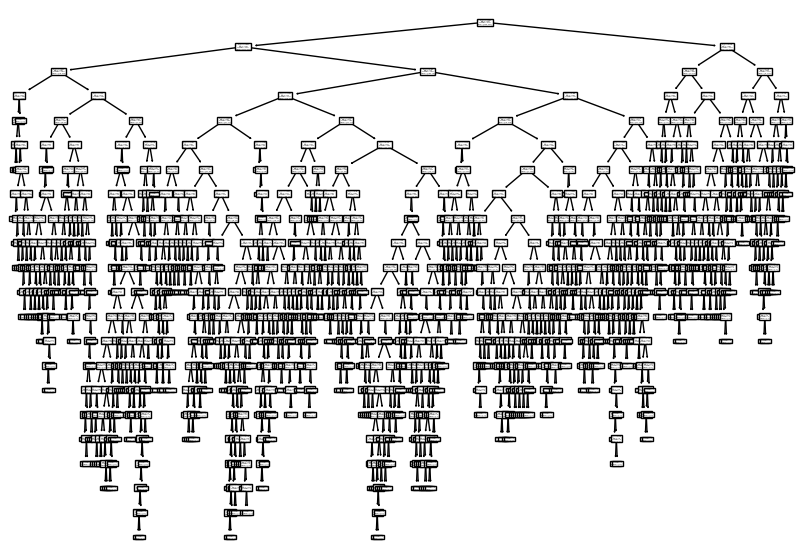

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)

plt.show()

너무 복잡하니 plot_tree() 메서드의 max_depth 파라미터를 이용하여 트리의 깊이를 제한해서 출력해보자. 

또한 filled 파라미터를 이용하면 클래스에 맞게 노드를 색칠할 수 있다. feature_names 파라미터는 해당 피처의 이름을 전달할 수 있다.

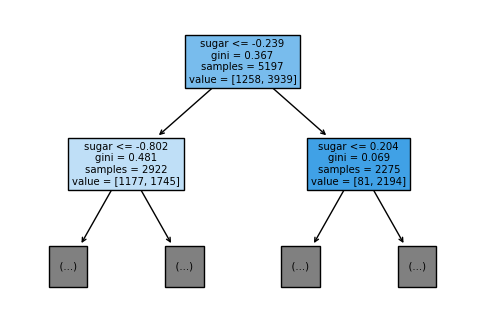

In [25]:
plt.figure(figsize=(6, 4))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'ph'])

plt.show()

- gini: 불순도

- samples: 총 샘플 수

- value: 클래스별 샘플 수

우선 루트노드는 sugar가 -0.239 이하인지 질문을 한다. 어떤 샘플의 sugar가 -0.239이하이면 왼쪽으로, 그렇지 않다면 오른쪽으로 간다. 즉 왼쪽이 Yes, 오른쪽이 No이다.

총 샘플 수는 5197개이며, 이 중 1258개는 음성 클래스(레드 와인)이며, 3939개는 양성 클래스(화이트 와인)이다.

후에 다음 왼쪽 노드를 살펴보자. 해당 샘플의 sugar가 -0.802보다 낮거나 같다면 왼쪽 가지로, -0.802보다 크면 오른쪽 가지로 이동한다.

왼쪽 노드의 총 샘플 수는 2922개로, 오른쪽 노드와 비교하면 오른쪽 노드의 총 샘플 수는 2275개이다. 파라미터 filled=True를 설정ㄹ하면 클래스마다 색깔을 부여하며, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다.

결정 트리에서 예측하는 원리는 리프 노드(가장 끝 노드)에서 가장 많은 클래스가 예측 클래스가 된다.

#### 불순도(gini)

> 불순도란? 불순도란 다양한 범주(Factor)들의 개체들이 얼마나 포함되어 있는가를 의미한다

DecisionTreeClassfier 클래스의 criterion 매개변수의 기본값은 'gini'이다. 

criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. 앞의 트리에서 루트 노드는 어떻게 sugar -0.239를 기준으로 왼쪽 노드와 오른쪽 노드로 나누었을까.

바로 criterion(표준) 매개변수에 지정한 gini 불순도를 사용한다.

지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)

루트 노드를 보면 총 5197개의 샘플이 있고 그 중 1258개가 음성 클래스, 3939개가 양성 클래스다. 따라서 지니 불순도는 다음과 같다

1 - ((1258 / 5197)^2 + (3939 / 5197)^2) = 0.367

만약 100개의 샘플이 있는데 양성 클래스와 음성 클래스의 비율이 정확히 1/2라 하자. 그렇다면 지니 불순도는 다음과 같다.

1 - ((50 / 100)^2 + (50 / 100)^2) = 0.5

지니 불순도가 0.5는 최악이다.

노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작다. 이런 노드를 순수 노드라 부른다.

<hr/>

결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다. 부모노드와 자식 노드의 불순도 차이를 계산하는 방법은 다음과 같다.

1. 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더한다.

2. 부모 노드의 불순도에서 뺀다.

ex) 앞의 부모 노드를 보면 총 샘플 5197개가 왼쪽 노드로 2922개의 샘플, 오른쪽 노드로는 2275개의 샘플이 이동했다.

그렇다면 불순도의 차이는 다음과 같다.

> 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드의 불순도 - (오른쪽 노드의 샘플 수 / 부모의 샘플 수) * 오른쪽 노드의 불순도

= 0.367 - (2922 / 5197) * 0.481 - (2275 / 5197) * 0.069 = **0.066**

이런 부모와 자식 노드사이의 불순도 차이를 **정보 이득(information gain)** 이라 한다.

이 모델은 정보 이득이 최대가 되도록 데이터를 나눈다.

> 불순도를 최대로 증가시켜, 하나의 클래스로 분류되게 만든다.

<hr/>

하지만 사이킷런의 의사결정나무 클래스에서는 또다른 불순도 기준이 있다. criterion='entropy'를 지정하여 엔트로피 불순도를 사용할 수 있다.

엔트로피 불순도도 노드의 클래스 비율을 사용하지만, 지니 불순도처럼 제곱이 아닌 밑이 2인 로그를 사용한다.

> -(음성 클래스 비율 * log2(음성 클래스 비율)) - (양성 클래스 비율 * log2(양성 클래스 비율)) 

= -(1258 / 5197) * log2(1258 / 5197) - (3939 / 5197) * log2(3939 / 5197) = 0.798

보통 기본값인 지니 불순도와 엔트로피 불순도의 차이는 크지 않다.

<hr/>

앞에서의 트리는 제한없이 성장했기 때문에 과대적합이 발생했다. 이것을 방지하기 위한 방법은 **가지치기**이다.

결정 트리에서 가지치기를 하는 간단한 방법은 최대 깊이를 지정하는 것이다. 

> 3으로 지정 후 모델을 만들어보자

In [26]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_y)

print(dt.score(train_scaled, train_y))
print(dt.score(test_scaled, test_y))

0.8454877814123533
0.8415384615384616


학습용 데이터셋의 점수는 낮아졌지만, 테스트용 데이터셋의 점수는 거의 그대로이다.

한 번 plot_tree() 메서드를 이용하여 확인해보자.

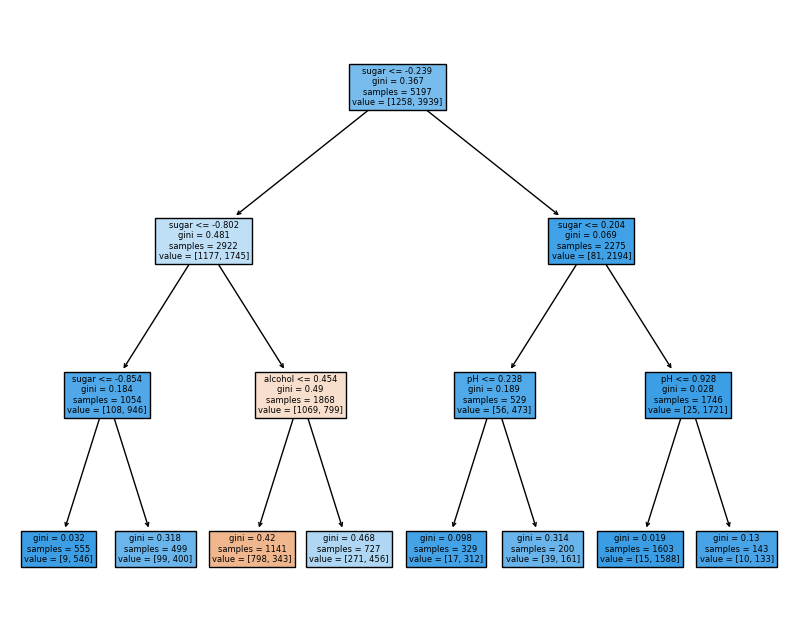

In [29]:
plt.figure(figsize= (10 ,8))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

하지만 여기에서 sugar <= -0.239가 무엇일까. 당도가 음수가 나올 수 있나? 아마 아까 피처 스케일링을 한 것 때문에 음수가 나온 듯 싶다. 

하지만 여기에서 결정 트리의 장점이 나온다. 결정 트리 알고리즘은 피처의 스케일에 영향을 받지 않는다. 즉 피처 스케일링(데이터 전처리)를 할 필요가 없다.

피처 스케일링 전, 데이터를 이용하여 다시 의사결정나무 모델을 구현해보자

In [30]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_X, train_y)

print(dt.score(train_X, train_y))
print(dt.score(test_X, test_y))

0.8454877814123533
0.8415384615384616


피처 스케일링한 데이터와 정확히 같다. 다시 트리를 그려보자.

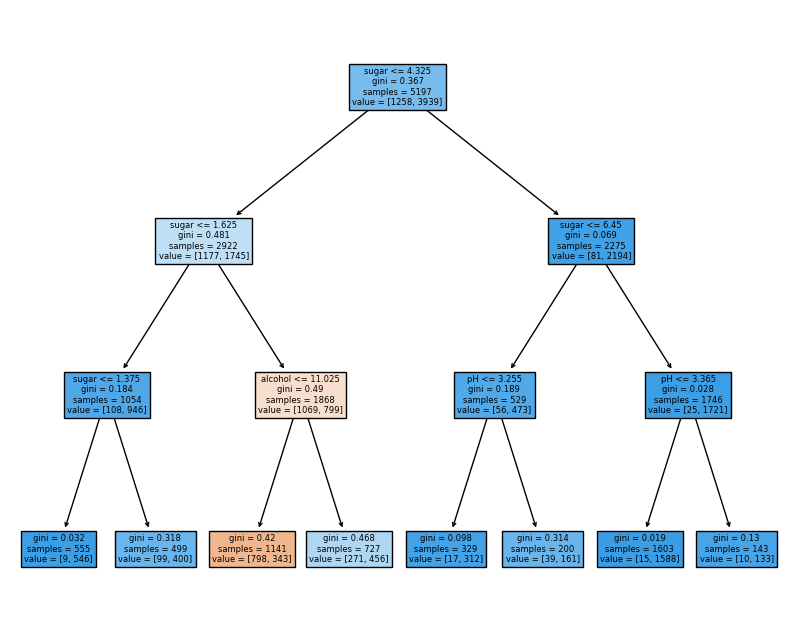

In [31]:
plt.figure(figsize= (10 ,8))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

해당 트리는 루트 노드와 깊이가 1인 노드에서 sugar이란 피처를 사용했다. 때문에 아마도 당도(sugar)가 가장 중요한 특성 중 하나일 것 같다.

특성 중요도를 출력하는 feature_importances_ 속성을 이용하여 모델의 피처 중요도를 확인해보자

In [32]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


두 번째 피처(sugar)가 0.86으로 가장 높다.